# Análise de Dados utilizando Séries Temporais

# Importando as bibliotecas necessárias

In [15]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import warnings
from datetime import datetime
from matplotlib.pylab import rcParams
#warnings.filterwarnings('ignore') - inibir mensagens de erro ou avisos

# 1. Leitura do DataSet

In [10]:
data = pd.read_csv('passageirosVoos.csv')
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# 2. Tratando os Dados

In [11]:
#Transformando a coluna Month em Índice
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format = True)
data = data.set_index(['Month'])
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


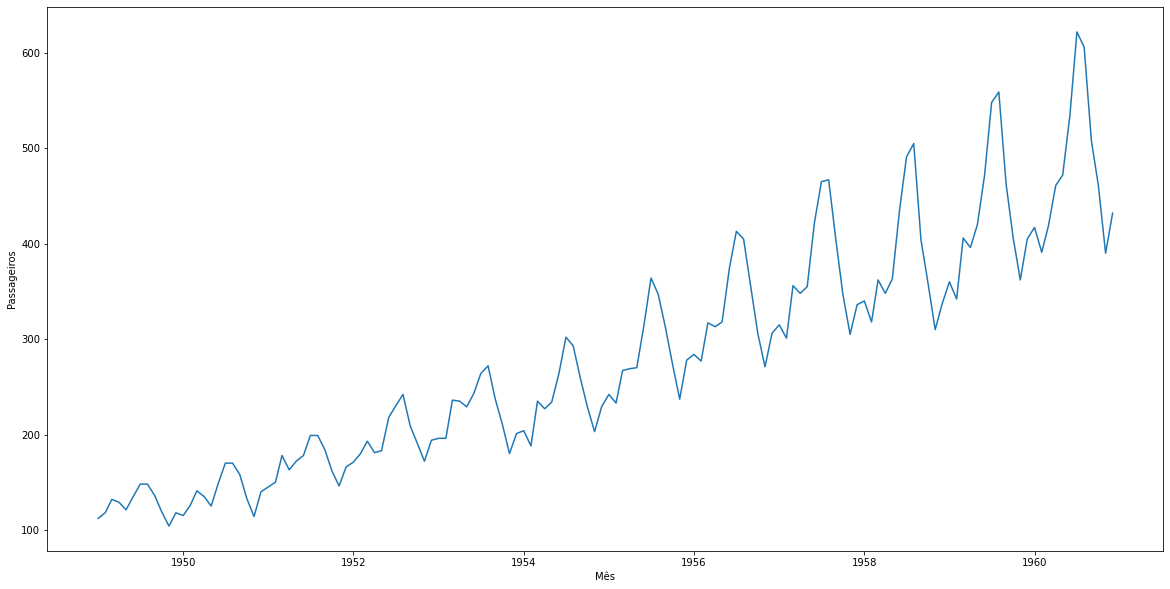

In [16]:
#Plotando Gráfico de números de Passageiros
plt.figure(figsize = (20, 10))
plt.xlabel('Mês')
plt.ylabel('Passageiros')
plt.plot(data)

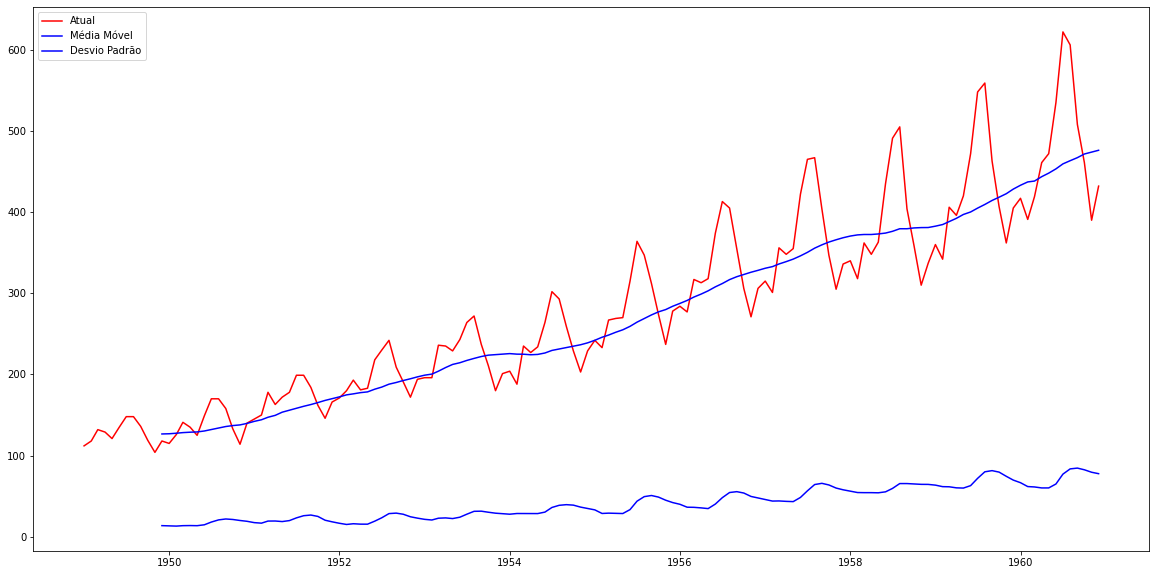

In [19]:
#Plotar gráfico juntamente com média móvel e desvio padrão
plt.figure(figsize = (20, 10))
atual = plt.plot(data, color = 'red', label = 'Atual')
dados_media_movel = data.rolling(window = 12).mean()
dados_desvio_padrao = data.rolling(window = 12).std()
media_movel_6 = plt.plot(dados_media_movel, color='blue', label = 'Média Móvel')
desvio_padrao_6 = plt.plot(dados_desvio_padrao, color = 'blue', label = 'Desvio Padrão')
plt.legend(loc = 'best')
plt.show(block = False)



## 3. Hipóteses

In [22]:
#Verificar se os dados temporais são estacionários (estão em torno da média) ou não

from statsmodels.tsa.stattools import adfuller
print('Teste Duckey-Fuller')
dftest = adfuller(data['Passengers'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'Lags used', 'Nro Obs'])

for key, value in dftest[4].items():
    dfoutput['Valor crítico (%s)'%key] = value
    
print(dfoutput)

Teste Duckey-Fuller
Test Statistic           0.815369
p-value                  0.991880
Lags used               13.000000
Nro Obs                130.000000
Valor crítico (1%)      -3.481682
Valor crítico (5%)      -2.884042
Valor crítico (10%)     -2.578770
dtype: float64


Interpretação do resultado:

Como o valor de p-value foi superior a 0.05, falhamos em rejeitar a hipótese nula usando o teste ADF e falhando em rejeitar a hipótese nula, temos que aceitar que a série temporal não é estacionária

Obs. Quanto mais próximo de 0, devemos aceitar a hipótese nula e quanto mais perto de 1, rejeitar

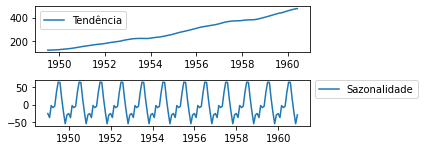

In [30]:
#Tendência de Sazonalidade
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data)

trend = decomp.trend
seasonal = decomp.seasonal

plt.subplot(412)
plt.plot(trend, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Sazonalidade')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
#plt.legend(loc = 'best')
plt.tight_layout()